In [5]:
from pathlib import Path
import pandas as pd

DATA_DIR = Path("bumperanalysis")
TZ = "America/New_York"
RESAMPLE = "15min"   


In [6]:
CSV_FILES = {
    "Cecil Hall": "cecil-hall-T.csv",
    "Fraktur": "fraktur-T.csv",
    "Readborne Passage": "readbourne-passage-T.csv",
    "Nemours": "nemours-T.csv",
    "Readborne Room": "readbourne-room-T.csv",
}

In [8]:
import pandas as pd


cecil = pd.read_csv("bumperanalysis/cecil-hall-T.csv")
fraktur = pd.read_csv("bumperanalysis/fraktur-T.csv")
readbourne_passage = pd.read_csv("bumperanalysis/readbourne-passage-T.csv")
nemours = pd.read_csv("bumperanalysis/nemours-T.csv")
readbourne_room = pd.read_csv("bumperanalysis/readbourne-room-T.csv")

# Display the first few rows of each
print("Cecil Hall:")
display(cecil.head())

print("Fraktur:")
display(fraktur.head())

print("Readbourne Passage:")
display(readbourne_passage.head())

print("Nemours:")
display(nemours.head())

print("Readbourne Room:")
display(readbourne_room.head())


Cecil Hall:


,,,history:WirelessDemo/7th Flr Cecil Hall Temp
Timestamp,Trend Flags,Status,Value (°F)
04-May-23 6:00:00 AM EDT,{ },{ok},68.9
04-May-23 6:15:01 AM EDT,{ },{ok},68.9
04-May-23 6:30:00 AM EDT,{ },{ok},68.8
04-May-23 6:45:00 AM EDT,{ },{ok},69.0


Fraktur:


,,,history:BoilerRoom/FracF_Temp
Timestamp,Trend Flags,Status,Value (°F)
04-May-23 5:15:01 AM EDT,{ },{ok},73.8
04-May-23 5:30:01 AM EDT,{ },{ok},73.6
04-May-23 5:45:01 AM EDT,{ },{ok},73.3
04-May-23 6:00:01 AM EDT,{ },{ok},73.3


Readbourne Passage:


,,,history:WirelessDemo/Readbourne Passage Temp
Timestamp,Trend Flags,Status,Value (°F)
04-May-23 6:00:01 AM EDT,{ },{unackedAlarm},70.0
04-May-23 6:15:01 AM EDT,{ },{unackedAlarm},70.0
04-May-23 6:30:01 AM EDT,{ },{unackedAlarm},70.0
04-May-23 6:45:01 AM EDT,{ },{unackedAlarm},70.0


Nemours:


,,,history:WirelessDemo/Nemours_Room_Temp
Timestamp,Trend Flags,Status,Value (°F)
04-May-23 6:00:00 AM EDT,{ },{ok},68.0
04-May-23 6:15:01 AM EDT,{ },{ok},67.8
04-May-23 6:30:00 AM EDT,{ },{ok},67.8
04-May-23 6:45:00 AM EDT,{ },{ok},67.8


Readbourne Room:


,,,history:BoilerRoom/Readbourne_Temp
Timestamp,Trend Flags,Status,Value (°F)
04-May-23 5:15:01 AM EDT,{ },{unackedAlarm},69.9
04-May-23 5:30:01 AM EDT,{ },{unackedAlarm},70.2
04-May-23 5:45:01 AM EDT,{ },{unackedAlarm},69.6
04-May-23 6:00:01 AM EDT,{ },{unackedAlarm},70.8


In [34]:
import pandas as pd

# Load each file
cecil = pd.read_csv("bumperanalysis/cecil-hall-T.csv",skiprows=2)
fraktur = pd.read_csv("bumperanalysis/fraktur-T.csv",skiprows=2)
readbourne_passage = pd.read_csv("bumperanalysis/readbourne-passage-T.csv",skiprows=2)
nemours = pd.read_csv("bumperanalysis/nemours-T.csv",skiprows=2)
readbourne_room = pd.read_csv("bumperanalysis/readbourne-room-T.csv",skiprows=2)



In [39]:
print(readbourne_room.columns)

Index(['Timestamp', 'Trend Flags', 'Status', 'Value (°F)'], dtype='object')


In [45]:
for df in [cecil, fraktur, readbourne_passage, nemours, readbourne_room]:
    df.rename(columns={'Value (°F)': 'Value'}, inplace=True)

In [46]:
dfs = {
    "Cecil Hall": cecil,
    "Fraktur": fraktur,
    "Readbourne Passage": readbourne_passage,
    "Nemours": nemours,
    "Readbourne Room": readbourne_room

}


In [47]:
for name, df in dfs.items():
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())

    # Convert Value column to numeric temperature
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

    # Check missing or zero values
    n_missing = df["Value"].isna().sum()
    n_zero = (df["Value"] == 0).sum()

    print(f"Missing values: {n_missing}")
    print(f"Zero values: {n_zero}")
    print(df["Value"].describe())


===== Cecil Hall =====
Shape: (80934, 4)
Columns: ['Timestamp', 'Trend Flags', 'Status', 'Value']
Missing values: 0
Zero values: 120
count    80934.000000
mean        69.801270
std          3.483255
min          0.000000
25%         68.100000
50%         69.900000
75%         71.700000
max         76.900000
Name: Value, dtype: float64

===== Fraktur =====
Shape: (77585, 4)
Columns: ['Timestamp', 'Trend Flags', 'Status', 'Value']
Missing values: 0
Zero values: 128
count    77585.000000
mean        71.973992
std          3.396291
min          0.000000
25%         70.700000
50%         72.000000
75%         73.600000
max         78.000000
Name: Value, dtype: float64

===== Readbourne Passage =====
Shape: (80934, 4)
Columns: ['Timestamp', 'Trend Flags', 'Status', 'Value']
Missing values: 0
Zero values: 132
count    80934.000000
mean        68.711621
std          3.436528
min          0.000000
25%         68.000000
50%         68.900000
75%         70.000000
max         92.400000
Name: Val

In [51]:
for name, df in dfs.items():
    print(f"\n===== {name} =====")
    display(df.head())


===== Cecil Hall =====


,Timestamp,Trend Flags,Status,Value
0,04-May-23 6:00:00 AM EDT,{ },{ok},68.9
1,04-May-23 6:15:01 AM EDT,{ },{ok},68.9
2,04-May-23 6:30:00 AM EDT,{ },{ok},68.8
3,04-May-23 6:45:00 AM EDT,{ },{ok},69.0
4,04-May-23 7:00:00 AM EDT,{ },{ok},68.9



===== Fraktur =====


,Timestamp,Trend Flags,Status,Value
0,04-May-23 5:15:01 AM EDT,{ },{ok},73.8
1,04-May-23 5:30:01 AM EDT,{ },{ok},73.6
2,04-May-23 5:45:01 AM EDT,{ },{ok},73.3
3,04-May-23 6:00:01 AM EDT,{ },{ok},73.3
4,04-May-23 6:15:01 AM EDT,{ },{ok},72.9



===== Readbourne Passage =====


,Timestamp,Trend Flags,Status,Value
0,04-May-23 6:00:01 AM EDT,{ },{unackedAlarm},70.0
1,04-May-23 6:15:01 AM EDT,{ },{unackedAlarm},70.0
2,04-May-23 6:30:01 AM EDT,{ },{unackedAlarm},70.0
3,04-May-23 6:45:01 AM EDT,{ },{unackedAlarm},70.0
4,04-May-23 7:00:01 AM EDT,{ },{unackedAlarm},70.0



===== Nemours =====


,Timestamp,Trend Flags,Status,Value
0,04-May-23 6:00:00 AM EDT,{ },{ok},68.0
1,04-May-23 6:15:01 AM EDT,{ },{ok},67.8
2,04-May-23 6:30:00 AM EDT,{ },{ok},67.8
3,04-May-23 6:45:00 AM EDT,{ },{ok},67.8
4,04-May-23 7:00:00 AM EDT,{ },{ok},67.7



===== Readbourne Room =====


,Timestamp,Trend Flags,Status,Value
0,04-May-23 5:15:01 AM EDT,{ },{unackedAlarm},69.9
1,04-May-23 5:30:01 AM EDT,{ },{unackedAlarm},70.2
2,04-May-23 5:45:01 AM EDT,{ },{unackedAlarm},69.6
3,04-May-23 6:00:01 AM EDT,{ },{unackedAlarm},70.8
4,04-May-23 6:15:01 AM EDT,{ },{unackedAlarm},70.6


In [59]:
import pandas as pd
from pathlib import Path

base = Path("bumperanalysis")

raw = {
    "Cecil Hall": pd.read_csv(base / "cecil-hall-T.csv", skiprows=2),
    "Fraktur": pd.read_csv(base / "fraktur-T.csv", skiprows=2),
    "Readbourne Passage": pd.read_csv(base / "readbourne-passage-T.csv", skiprows=2),
    "Nemours": pd.read_csv(base / "nemours-T.csv", skiprows=2),
    "Readbourne Room": pd.read_csv(base / "readbourne-room-T.csv", skiprows=2),
}

# sanity check columns
for name, df in raw.items():
    print(f"{name}: {df.columns.tolist()[:6]}")


Cecil Hall: ['Timestamp', 'Trend Flags', 'Status', 'Value (°F)']
Fraktur: ['Timestamp', 'Trend Flags', 'Status', 'Value (°F)']
Readbourne Passage: ['Timestamp', 'Trend Flags', 'Status', 'Value (°F)']
Nemours: ['Timestamp', 'Trend Flags', 'Status', 'Value (°F)']
Readbourne Room: ['Timestamp', 'Trend Flags', 'Status', 'Value (°F)']


In [60]:
import re

def parse_ts_col(df):
    # pick the timestamp column by name
    ts_col = "Timestamp" if "Timestamp" in df.columns else None
    if ts_col is None:
        raise KeyError(f"No 'Timestamp' column found. Available: {df.columns.tolist()}")

    ts = (
        df[ts_col].astype(str)
        .str.strip()
        .str.replace(r"\s+(EDT|EST|ET)\b", "", regex=True)
    )
    # exact format: 04-May-23 6:00:00 AM
    dt = pd.to_datetime(ts, format="%d-%b-%y %I:%M:%S %p", errors="coerce")

    # If all failed, show a few raw examples so we can adjust the format
    if dt.notna().sum() == 0:
        print("Could not parse any timestamps. Here are a few raw examples:")
        print(ts.head(10).to_list())
    return dt

# build a new dict with parsed/cleaned copies
clean = {}
for name, df in raw.items():
    df2 = df.copy()
    df2["Timestamp"] = parse_ts_col(df2)
    df2 = df2.dropna(subset=["Timestamp"]).sort_values("Timestamp").reset_index(drop=True)

    # compute continuity
    df2["TimeDiff_min"] = df2["Timestamp"].diff().dt.total_seconds() / 60
    start, end = df2["Timestamp"].min(), df2["Timestamp"].max()
    avg_gap = df2["TimeDiff_min"].iloc[1:].mean()
    max_gap = df2["TimeDiff_min"].iloc[1:].max()

    print(f"\n===== {name} =====")
    print(f"Records: {len(df2):,}")
    print(f"Coverage: {start} → {end}")
    print(f"Average interval: {avg_gap:.2f} min")
    print(f"Largest gap: {max_gap:.2f} min")

    clean[name] = df2  # only save after success



===== Cecil Hall =====
Records: 80,934
Coverage: 2023-05-04 06:00:00 → 2025-10-02 11:45:00
Average interval: 15.70 min
Largest gap: 56130.00 min

===== Fraktur =====
Records: 77,575
Coverage: 2023-05-04 05:15:01 → 2025-10-02 11:45:00
Average interval: 16.38 min
Largest gap: 40440.00 min

===== Readbourne Passage =====
Records: 80,934
Coverage: 2023-05-04 06:00:01 → 2025-10-02 11:45:00
Average interval: 15.70 min
Largest gap: 56130.00 min

===== Nemours =====
Records: 80,934
Coverage: 2023-05-04 06:00:00 → 2025-10-02 11:45:00
Average interval: 15.70 min
Largest gap: 56130.00 min

===== Readbourne Room =====
Records: 77,174
Coverage: 2023-05-04 05:15:01 → 2025-10-02 11:30:00
Average interval: 16.46 min
Largest gap: 40440.00 min


In [61]:
for name, df in clean.items():   # use your cleaned data (with TimeDiff_min already computed)
    gaps = df["Timestamp"].diff().dt.total_seconds() / 60

    count_over_20 = (gaps > 20).sum()
    count_over_25 = (gaps > 25).sum()
    total = gaps.notna().sum()

    print(f"\n===== {name} =====")
    print(f"Total valid intervals: {total:,}")
    print(f"Intervals > 20 min: {count_over_20:,}  ({count_over_20/total:.2%})")
    print(f"Intervals > 25 min: {count_over_25:,}  ({count_over_25/total:.2%})")



===== Cecil Hall =====
Total valid intervals: 80,933
Intervals > 20 min: 27  (0.03%)
Intervals > 25 min: 27  (0.03%)

===== Fraktur =====
Total valid intervals: 77,574
Intervals > 20 min: 53  (0.07%)
Intervals > 25 min: 53  (0.07%)

===== Readbourne Passage =====
Total valid intervals: 80,933
Intervals > 20 min: 27  (0.03%)
Intervals > 25 min: 27  (0.03%)

===== Nemours =====
Total valid intervals: 80,933
Intervals > 20 min: 27  (0.03%)
Intervals > 25 min: 27  (0.03%)

===== Readbourne Room =====
Total valid intervals: 77,173
Intervals > 20 min: 53  (0.07%)
Intervals > 25 min: 53  (0.07%)


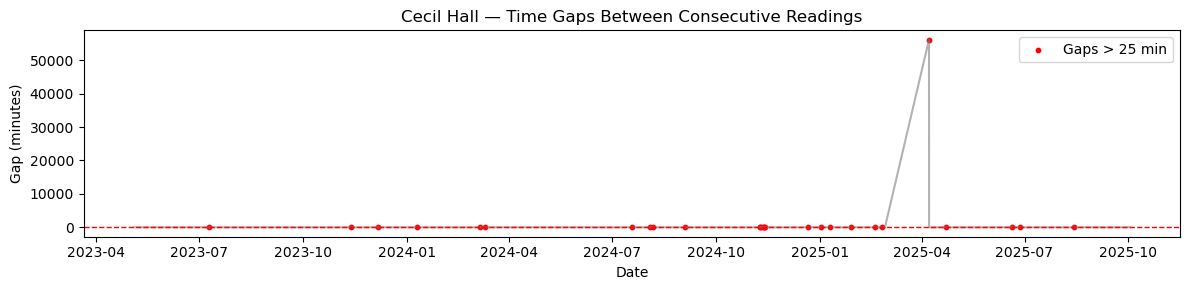

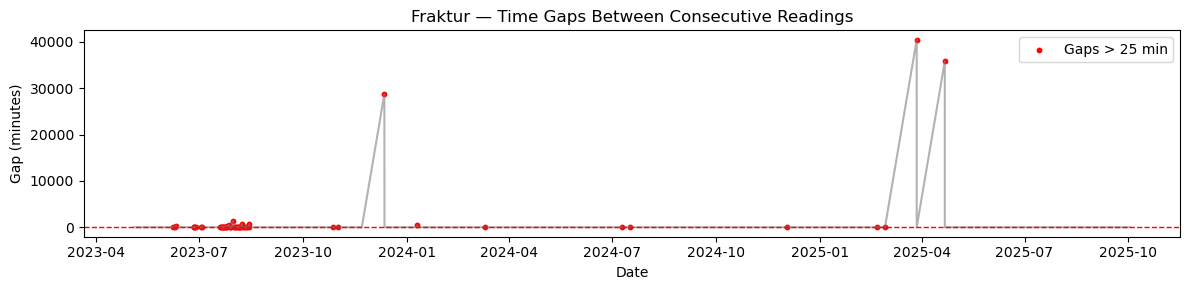

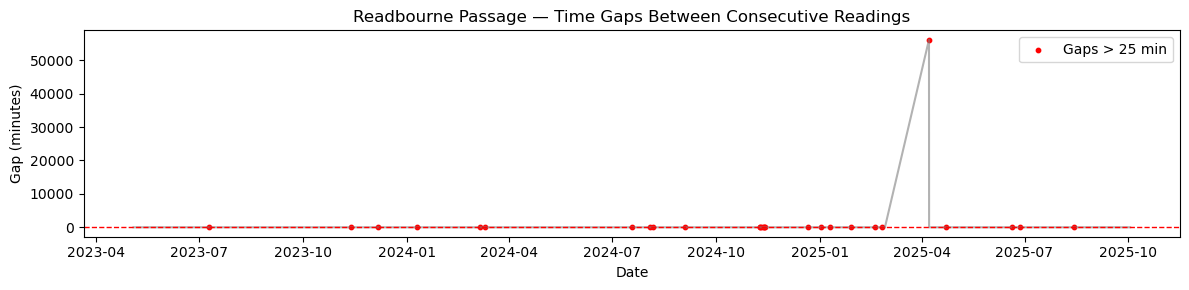

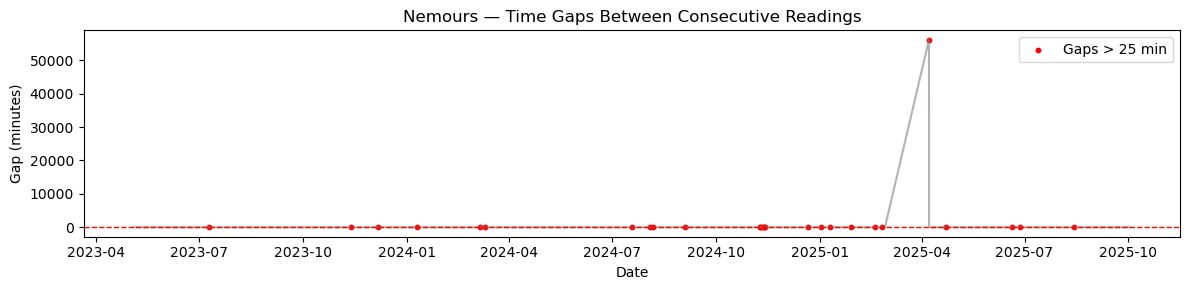

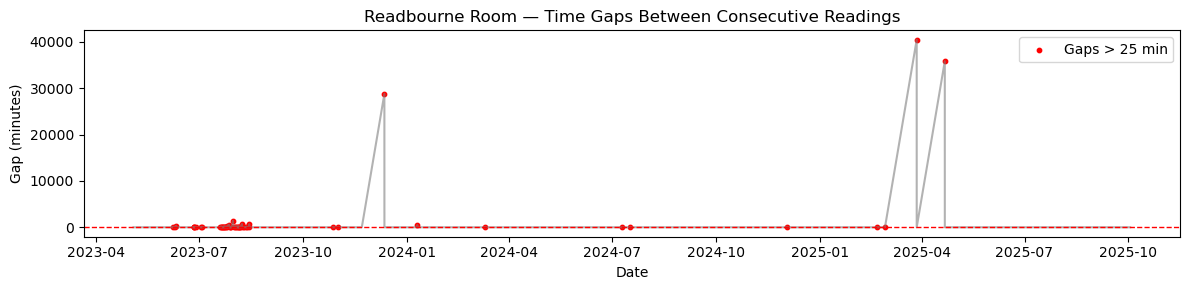

In [62]:
import matplotlib.pyplot as plt

threshold = 25  # minutes

for name, df in clean.items():
    plt.figure(figsize=(12, 3))
    df = df.copy()
    df["TimeDiff_min"] = df["Timestamp"].diff().dt.total_seconds() / 60

    plt.plot(df["Timestamp"], df["TimeDiff_min"], color="gray", alpha=0.6)
    plt.scatter(df.loc[df["TimeDiff_min"] > threshold, "Timestamp"],
                df.loc[df["TimeDiff_min"] > threshold, "TimeDiff_min"],
                color="red", label=f"Gaps > {threshold} min", s=10)

    plt.axhline(threshold, color="red", linestyle="--", linewidth=1)
    plt.title(f"{name} — Time Gaps Between Consecutive Readings")
    plt.xlabel("Date")
    plt.ylabel("Gap (minutes)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [66]:
import pandas as pd

threshold = 25  # minutes

for name, df in clean.items():
    df = df.copy()
    df["TimeDiff_min"] = df["Timestamp"].diff().dt.total_seconds() / 60

    summary_rows = []
    large_gap_idx = df.index[df["TimeDiff_min"] > threshold]

    for i in large_gap_idx:
        start_time = df.loc[i - 1, "Timestamp"] if i > 0 else pd.NaT
        end_time = df.loc[i, "Timestamp"]
        duration_min = df.loc[i, "TimeDiff_min"]

        summary_rows.append({
            "Gap Start": start_time,
            "Gap End": end_time,
            "Duration (min)": duration_min,
            "Duration (hours)": round(duration_min / 60, 2),
            "Duration (days)": round(duration_min / 1440, 2)
        })

    gap_df = pd.DataFrame(summary_rows)
    gap_df = gap_df.sort_values("Gap Start").reset_index(drop=True)

    print(f"\n===== {name} =====")
    print(f"Total gaps > {threshold} minutes: {len(gap_df)}")
    if len(gap_df) > 0:
        display(gap_df)
    else:
        print("No gaps greater than threshold.")



===== Cecil Hall =====
Total gaps > 25 minutes: 27


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2023-07-09 22:00:00,2023-07-09 22:30:00,30.000000,0.50,0.02
1,2023-11-12 21:15:00,2023-11-12 21:45:00,30.000000,0.50,0.02
2,2023-12-06 08:30:00,2023-12-06 09:00:00,30.000000,0.50,0.02
3,2024-01-09 18:30:00,2024-01-09 19:00:00,30.000000,0.50,0.02
4,2024-03-06 08:45:00,2024-03-06 09:15:00,30.000000,0.50,0.02
5,2024-03-10 01:45:00,2024-03-10 03:00:00,75.000000,1.25,0.05
6,2024-07-18 13:30:00,2024-07-18 14:00:00,30.000000,0.50,0.02
7,2024-08-03 18:00:00,2024-08-03 18:30:00,30.000000,0.50,0.02
8,2024-08-06 08:30:00,2024-08-06 09:00:00,30.000000,0.50,0.02
9,2024-09-03 09:00:00,2024-09-03 09:30:00,30.000000,0.50,0.02



===== Fraktur =====
Total gaps > 25 minutes: 53


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2023-06-07 20:45:03,2023-06-07 23:00:01,134.966667,2.25,0.09
1,2023-06-09 15:15:03,2023-06-09 17:30:01,134.966667,2.25,0.09
2,2023-06-10 17:15:01,2023-06-10 22:45:01,330.000000,5.50,0.23
3,2023-06-26 20:30:03,2023-06-26 22:15:01,104.966667,1.75,0.07
4,2023-06-26 22:30:01,2023-06-26 23:00:01,30.000000,0.50,0.02
5,2023-06-27 01:30:01,2023-06-27 02:15:01,45.000000,0.75,0.03
6,2023-06-28 02:30:01,2023-06-28 03:00:00,29.983333,0.50,0.02
7,2023-07-02 17:45:03,2023-07-02 18:15:01,29.966667,0.50,0.02
8,2023-07-03 18:00:14,2023-07-03 19:15:01,74.783333,1.25,0.05
9,2023-07-19 16:45:13,2023-07-19 17:15:06,29.883333,0.50,0.02



===== Readbourne Passage =====
Total gaps > 25 minutes: 27


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2023-07-09 22:00:00,2023-07-09 22:30:00,30.000000,0.50,0.02
1,2023-11-12 21:15:01,2023-11-12 21:45:01,30.000000,0.50,0.02
2,2023-12-06 08:30:01,2023-12-06 09:00:01,30.000000,0.50,0.02
3,2024-01-09 18:30:00,2024-01-09 19:00:01,30.016667,0.50,0.02
4,2024-03-06 08:45:00,2024-03-06 09:15:00,30.000000,0.50,0.02
5,2024-03-10 01:45:00,2024-03-10 03:00:00,75.000000,1.25,0.05
6,2024-07-18 13:30:00,2024-07-18 14:00:00,30.000000,0.50,0.02
7,2024-08-03 18:00:00,2024-08-03 18:30:00,30.000000,0.50,0.02
8,2024-08-06 08:30:00,2024-08-06 09:00:00,30.000000,0.50,0.02
9,2024-09-03 09:00:00,2024-09-03 09:30:00,30.000000,0.50,0.02



===== Nemours =====
Total gaps > 25 minutes: 27


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2023-07-09 22:00:00,2023-07-09 22:30:00,30.000000,0.50,0.02
1,2023-11-12 21:15:00,2023-11-12 21:45:00,30.000000,0.50,0.02
2,2023-12-06 08:30:00,2023-12-06 09:00:00,30.000000,0.50,0.02
3,2024-01-09 18:30:00,2024-01-09 19:00:00,30.000000,0.50,0.02
4,2024-03-06 08:45:00,2024-03-06 09:15:00,30.000000,0.50,0.02
5,2024-03-10 01:45:00,2024-03-10 03:00:00,75.000000,1.25,0.05
6,2024-07-18 13:30:00,2024-07-18 14:00:00,30.000000,0.50,0.02
7,2024-08-03 18:00:00,2024-08-03 18:30:00,30.000000,0.50,0.02
8,2024-08-06 08:30:00,2024-08-06 09:00:00,30.000000,0.50,0.02
9,2024-09-03 09:00:00,2024-09-03 09:30:00,30.000000,0.50,0.02



===== Readbourne Room =====
Total gaps > 25 minutes: 53


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2023-06-07 20:45:04,2023-06-07 23:00:01,134.950000,2.25,0.09
1,2023-06-09 15:15:03,2023-06-09 17:30:01,134.966667,2.25,0.09
2,2023-06-10 17:15:01,2023-06-10 22:45:01,330.000000,5.50,0.23
3,2023-06-26 20:30:04,2023-06-26 22:15:01,104.950000,1.75,0.07
4,2023-06-26 22:30:01,2023-06-26 23:00:01,30.000000,0.50,0.02
5,2023-06-27 01:30:01,2023-06-27 02:15:01,45.000000,0.75,0.03
6,2023-06-28 02:30:01,2023-06-28 03:00:00,29.983333,0.50,0.02
7,2023-07-02 17:45:03,2023-07-02 18:15:01,29.966667,0.50,0.02
8,2023-07-03 18:00:14,2023-07-03 19:15:01,74.783333,1.25,0.05
9,2023-07-19 16:45:13,2023-07-19 17:15:06,29.883333,0.50,0.02


In [67]:
decaying_rooms = ["Cecil Hall", "Fraktur", "Readbourne Passage"]
adjacent_rooms = ["Nemours", "Readbourne Room"]


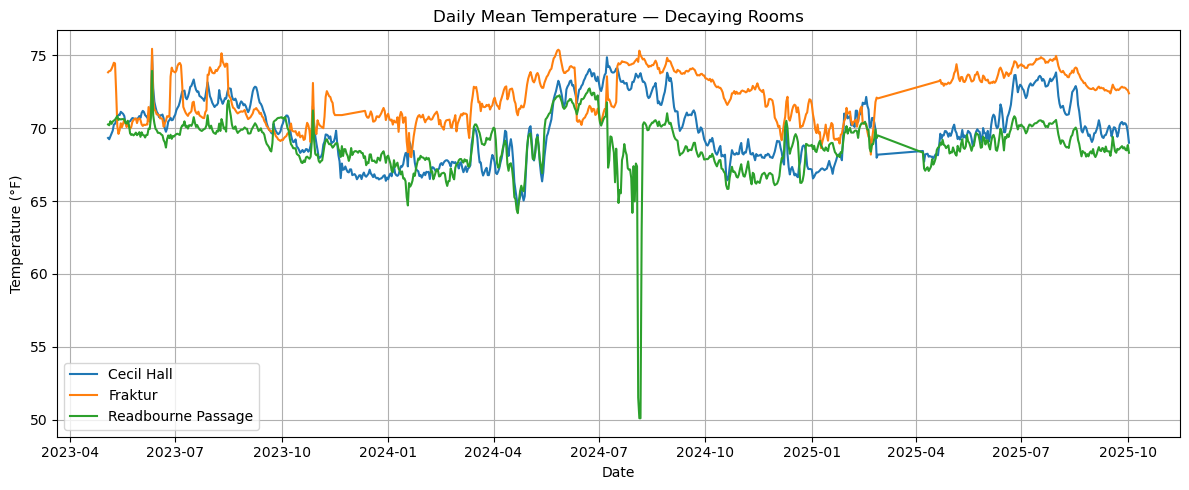

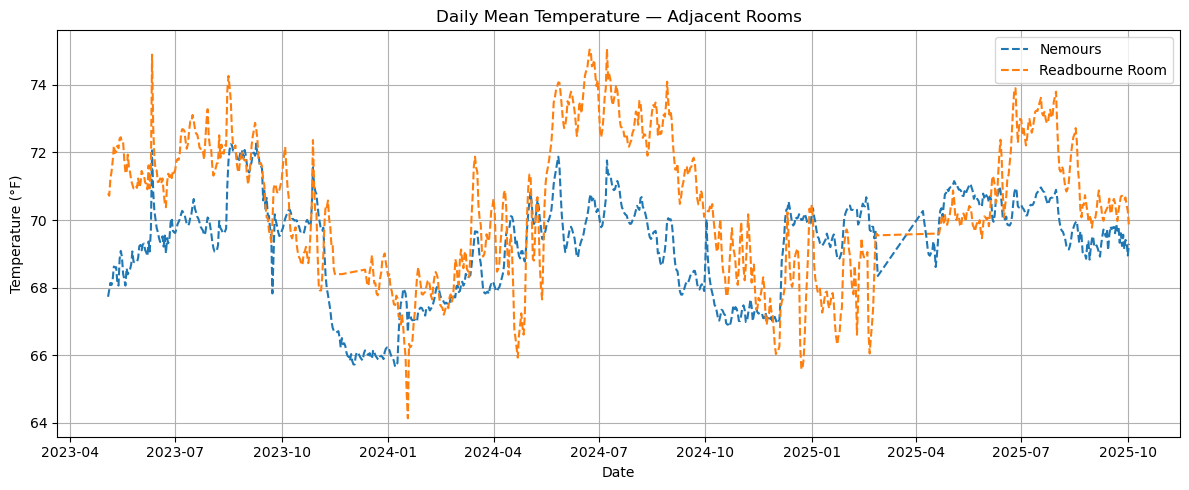

In [73]:
# ---- Filter unrealistic readings (optional but recommended)
daily_avg = []
for name, df in clean.items():
    temp_col = "Value" if "Value" in df.columns else "Value (°F)"
    df = df.copy()
    df = df.dropna(subset=[temp_col])
    df = df[(df[temp_col] >= 40) & (df[temp_col] <= 150)]  # realistic indoor range
    df["Date"] = df["Timestamp"].dt.date
    daily = df.groupby("Date")[temp_col].mean().reset_index()
    daily["Room"] = name
    daily_avg.append(daily)

daily_avg_df = pd.concat(daily_avg, ignore_index=True)

# ---------- Plot 1: Decaying Rooms ----------
plt.figure(figsize=(12,5))
for name in decaying_rooms:
    df = daily_avg_df[daily_avg_df["Room"] == name]
    plt.plot(df["Date"], df["Value (°F)"], label=name, linewidth=1.5)
plt.title("Daily Mean Temperature — Decaying Rooms")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot 2: Adjacent Rooms ----------
plt.figure(figsize=(12,5))
for name in adjacent_rooms:
    df = daily_avg_df[daily_avg_df["Room"] == name]
    plt.plot(df["Date"], df["Value (°F)"], label=name, linewidth=1.5, linestyle="--")
plt.title("Daily Mean Temperature — Adjacent Rooms")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
threshold_temp = 75  # °F

hot_days = []

for name, df in clean.items():
    temp_col = "Value" if "Value" in df.columns else "Value (°F)"
    df = df.copy()
    df = df.dropna(subset=[temp_col])
    df = df[(df[temp_col] >= 40) & (df[temp_col] <= 150)]  # realistic indoor range

    # daily average
    df["Date"] = df["Timestamp"].dt.date
    daily_avg = df.groupby("Date")[temp_col].mean().reset_index()

    # count days where mean temp > 75°F
    n_hot = (daily_avg[temp_col] > threshold_temp).sum()
    total_days = daily_avg["Date"].nunique()

    hot_days.append({
        "Room": name,
        "Days > 75°F": n_hot,
        "Total Days": total_days,
        "% of Days > 75°F": round((n_hot / total_days) * 100, 2)
    })

hot_days_df = pd.DataFrame(hot_days).sort_values("% of Days > 75°F", ascending=False)
display(hot_days_df)


,Room,Days > 75°F,Total Days,% of Days > 75°F
1,Fraktur,8,812,0.99
4,Readbourne Room,3,812,0.37
0,Cecil Hall,0,845,0.00
2,Readbourne Passage,0,845,0.00
3,Nemours,0,844,0.00


In [82]:
for name, df in clean.items():
    temp_col = "Value" if "Value" in df.columns else "Value (°F)"
    df = df.dropna(subset=[temp_col]).copy()
    df["Date"] = df["Timestamp"].dt.date
    daily_avg = df.groupby("Date")[temp_col].mean().reset_index()
    hot_dates = daily_avg[daily_avg[temp_col] > threshold_temp]
    
    if not hot_dates.empty:
        print(f"\n===== {name} — Days > 75°F =====")
        display(hot_dates)



===== Fraktur — Days > 75°F =====


,Date,Value (°F)
38,2023-06-11,75.447917
98,2023-08-10,75.141667
368,2024-05-25,75.098958
369,2024-05-26,75.315625
370,2024-05-27,75.386458
371,2024-05-28,75.304167
440,2024-08-05,75.321875
441,2024-08-06,75.022917



===== Readbourne Room — Days > 75°F =====


,Date,Value (°F)
397,2024-06-23,75.040625
398,2024-06-24,75.012500
412,2024-07-08,75.063542
651,2025-04-24,1568.552083


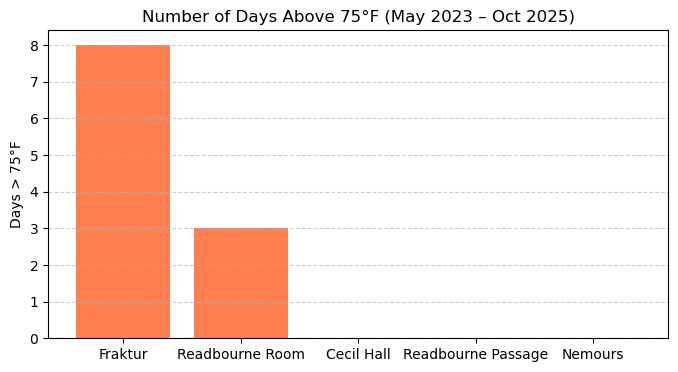

In [76]:
plt.figure(figsize=(8,4))
plt.bar(hot_days_df["Room"], hot_days_df["Days > 75°F"], color="coral")
plt.title("Number of Days Above 75°F (May 2023 – Oct 2025)")
plt.ylabel("Days > 75°F")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


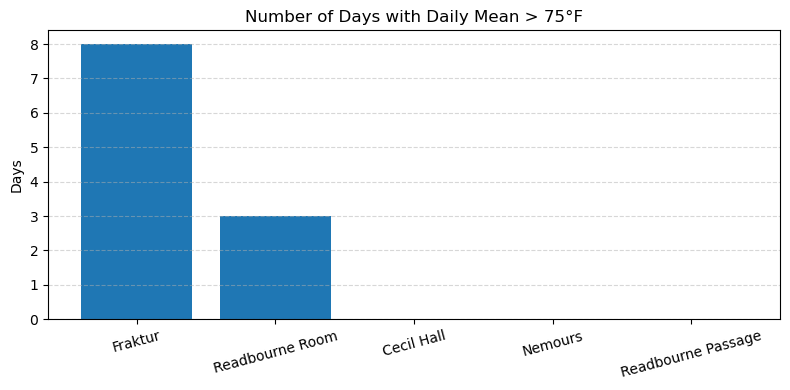

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = 75

# 1) Prepare daily means for all rooms (with a light sanity filter)
daily_all = []
for name, df in clean.items():
    col = "Value" if "Value" in df.columns else "Value (°F)"
    d = df[[ "Timestamp", col ]].dropna().copy()
    d = d[(d[col] >= 40) & (d[col] <= 150)]
    d["Date"] = d["Timestamp"].dt.date
    g = d.groupby("Date")[col].mean().reset_index()
    g["Room"] = name
    g.rename(columns={col: "Temp_F"}, inplace=True)
    daily_all.append(g)

daily = pd.concat(daily_all, ignore_index=True)

# -------- Visual 1: Bar chart of # hot days per room --------
hot_counts = (daily.assign(is_hot = daily["Temp_F"] > threshold)
                   .groupby("Room")["is_hot"].sum()
                   .reset_index(name="Days > 75°F")
                   .sort_values("Days > 75°F", ascending=False))

plt.figure(figsize=(8,4))
plt.bar(hot_counts["Room"], hot_counts["Days > 75°F"])
plt.title("Number of Days with Daily Mean > 75°F")
plt.ylabel("Days")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


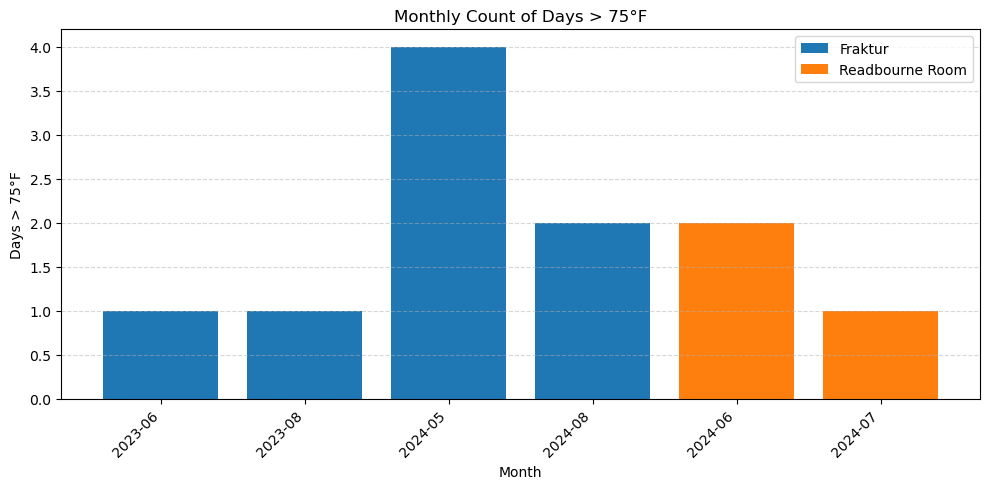

In [88]:
threshold = 75

# Month column
daily["Month"] = pd.to_datetime(daily["Date"]).dt.to_period("M")

# Monthly hot-day counts per room
hot_monthly = (
    daily.assign(is_hot=daily["Temp_F"] > threshold)
         .groupby(["Room", "Month"])["is_hot"]
         .sum()
         .reset_index()
)

# Only months with any hot days
hot_monthly = hot_monthly[hot_monthly["is_hot"] > 0]

# Option 1: simple bars per room
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for room in hot_monthly["Room"].unique():
    sub = hot_monthly[hot_monthly["Room"] == room]
    plt.bar(sub["Month"].astype(str), sub["is_hot"], label=room)

plt.title("Monthly Count of Days > 75°F")
plt.ylabel("Days > 75°F")
plt.xlabel("Month")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


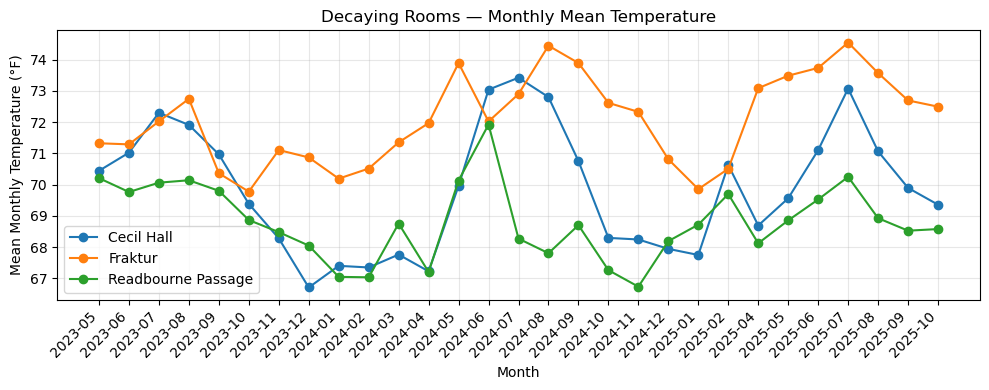

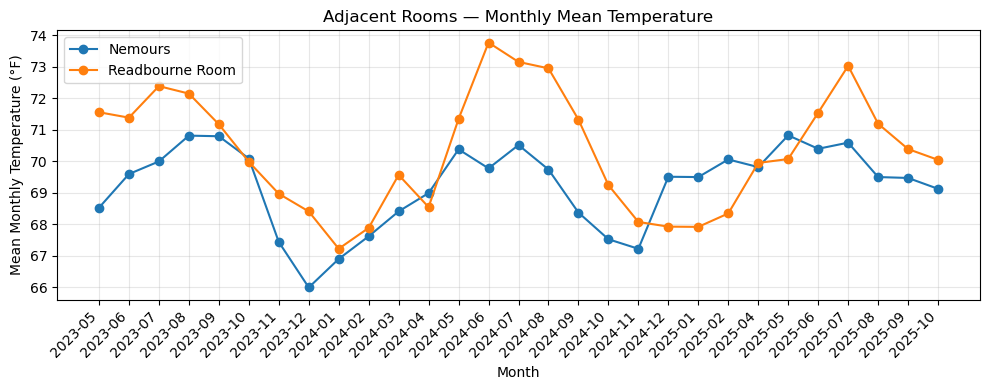

In [89]:
import matplotlib.pyplot as plt

# Define room groups
decaying_rooms = ["Cecil Hall", "Fraktur", "Readbourne Passage"]
adjacent_rooms = ["Nemours", "Readbourne Room"]

# Compute monthly mean temperature for each room
daily["Month"] = pd.to_datetime(daily["Date"]).dt.to_period("M")
monthly_means = (
    daily.groupby(["Room", "Month"])["Temp_F"]
         .mean()
         .reset_index()
)

# Plot function
def plot_group(rooms, title):
    plt.figure(figsize=(10, 4))
    for room in rooms:
        sub = monthly_means[monthly_means["Room"] == room]
        plt.plot(sub["Month"].astype(str), sub["Temp_F"], marker="o", label=room)
    plt.title(title)
    plt.ylabel("Mean Monthly Temperature (°F)")
    plt.xlabel("Month")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot decaying rooms
plot_group(decaying_rooms, "Decaying Rooms — Monthly Mean Temperature")

# Plot adjacent rooms
plot_group(adjacent_rooms, "Adjacent Rooms — Monthly Mean Temperature")


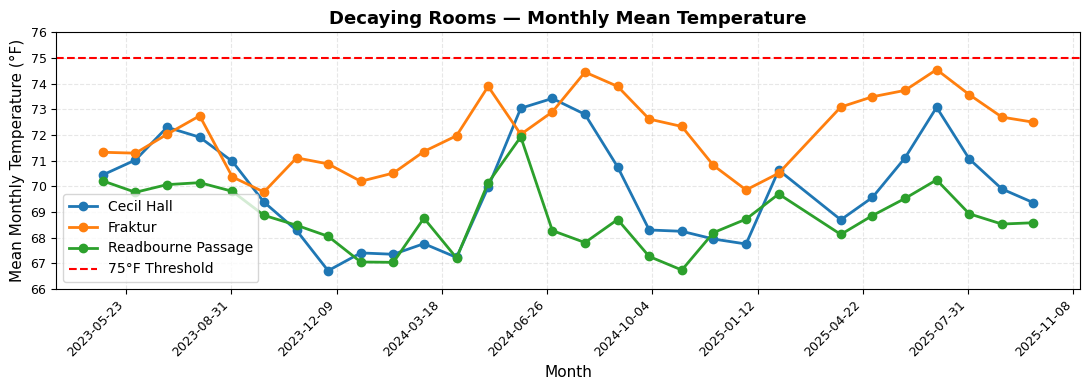

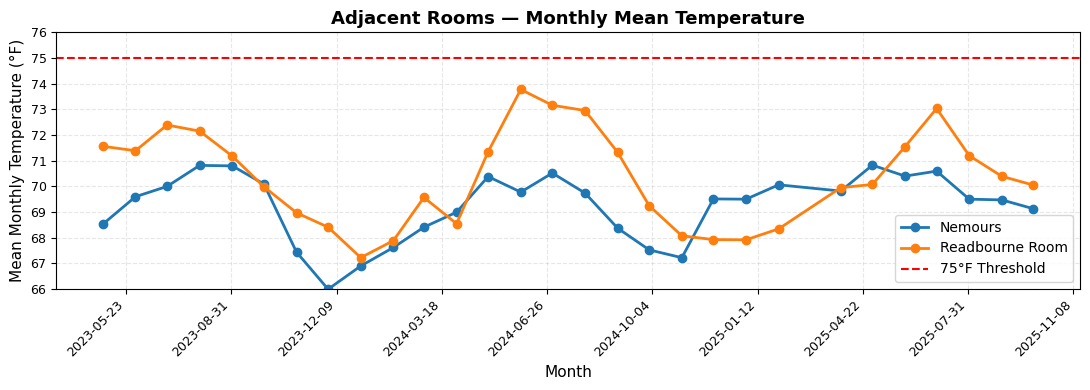

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define room groups
decaying_rooms = ["Cecil Hall", "Fraktur", "Readbourne Passage"]
adjacent_rooms = ["Nemours", "Readbourne Room"]

# Compute monthly mean temperature
daily["Month"] = pd.to_datetime(daily["Date"]).dt.to_period("M")
monthly_means = (
    daily.groupby(["Room", "Month"])["Temp_F"]
         .mean()
         .reset_index()
)
monthly_means["Month_dt"] = monthly_means["Month"].dt.to_timestamp()

def plot_group(rooms, title, y_min=66, y_max=76):
    plt.figure(figsize=(11, 4))
    for room in rooms:
        sub = monthly_means[monthly_means["Room"] == room]
        plt.plot(sub["Month_dt"], sub["Temp_F"], marker="o", label=room, linewidth=2)

    # Add threshold line at 75°F
    plt.axhline(75, color="red", linestyle="--", linewidth=1.5, label="75°F Threshold")

    # Title & labels
    plt.title(title, fontsize=13, weight="bold")
    plt.ylabel("Mean Monthly Temperature (°F)", fontsize=11)
    plt.xlabel("Month", fontsize=11)
    plt.xticks(rotation=45, ha="right", fontsize=9)
    plt.yticks(fontsize=9)

    # Ticks formatted precisely
    plt.ylim(y_min, y_max)
    plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(1))
    plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(12))

    plt.legend(frameon=True)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

# Plot decaying rooms
plot_group(decaying_rooms, "Decaying Rooms — Monthly Mean Temperature")

# Plot adjacent rooms
plot_group(adjacent_rooms, "Adjacent Rooms — Monthly Mean Temperature")


In [169]:
from pathlib import Path
import pandas as pd
from IPython.display import display

BASE = Path("bumperanalysis")   # folder containing the .pm2 files you listed

files = {
    "Cecil Hall": [
        "(OBIX) 7thFlrCecilHall.pm2",
    ],
    "Fraktur": [
        "(OBIX) Fraktur.pm2",
        "FRAKTUR ROOM.pm2",
        "FRAKTUR ROOM - 2011 ONWARD.pm2",
    ],
    "Readbourne Passage": [
        "(OBIX) ReadbornePassage.pm2",  
        "(OBIX) ReadbournePassage.pm2",
    ],
    "Nemours": [
        "(OBIX) Nemours.pm2",
    ],
    "Readbourne Room": [
       
    ],
}



In [170]:
def load_pm2_fixed(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path, skiprows=4, sep=r"\s+", header=None,
                     names=["Date", "Time", "Temp_F", "RH"])
    df["Timestamp"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")
    df["Temp_F"] = pd.to_numeric(df["Temp_F"], errors="coerce")
    df["RH"]     = pd.to_numeric(df["RH"], errors="coerce")
    df = df[["Timestamp", "Temp_F", "RH"]].dropna(subset=["Timestamp"]).sort_values("Timestamp")
    return df

room_df = {}
for room, flist in files.items():
    parts = []
    for fn in flist:
        p = BASE / fn
        if p.exists():
            parts.append(load_pm2_fixed(p))
        else:
            print(f"⚠️ Missing: {fn}")
    if parts:
        df = (pd.concat(parts, ignore_index=True)
                .sort_values("Timestamp")
                .drop_duplicates(subset=["Timestamp"])
                .reset_index(drop=True))
        # optional sanity clip
        df = df[(df["Temp_F"].between(40, 100)) | df["Temp_F"].isna()]
        room_df[room] = df

# Quick summary + head
for name, df in room_df.items():
    print(f"\n===== {name} =====")
    print(f"Rows: {len(df):,} | Coverage: {df['Timestamp'].min()} → {df['Timestamp'].max()}")
    print("Columns:", df.columns.tolist())
    print(df["Temp_F"].describe())
    display(df.head())


===== Cecil Hall =====
Rows: 335,533 | Coverage: 2013-07-09 14:45:00 → 2025-01-07 17:15:00
Columns: ['Timestamp', 'Temp_F', 'RH']
count    335533.000000
mean         69.813390
std           2.369739
min          60.300000
25%          67.800000
50%          70.100000
75%          71.800000
max          78.400000
Name: Temp_F, dtype: float64


,Timestamp,Temp_F,RH
0,2013-07-09 14:45:00,71.5,53
1,2013-07-09 15:00:00,71.5,52
2,2013-07-09 15:15:00,71.5,52
3,2013-07-09 15:30:00,71.4,52
4,2013-07-09 15:45:00,71.5,52



===== Fraktur =====
Rows: 366,755 | Coverage: 2009-09-04 15:59:00 → 2025-01-07 16:45:00
Columns: ['Timestamp', 'Temp_F', 'RH']
count    366755.000000
mean         68.976236
std           2.277083
min          57.000000
25%          67.300000
50%          68.800000
75%          70.500000
max          77.600000
Name: Temp_F, dtype: float64


,Timestamp,Temp_F,RH
0,2009-09-04 15:59:00,69.4,53
1,2009-09-04 16:01:00,69.3,53
2,2009-09-04 16:03:00,69.3,53
3,2009-09-04 16:06:00,69.3,53
4,2009-09-04 16:08:00,69.3,53



===== Readbourne Passage =====
Rows: 339,494 | Coverage: 2013-07-09 14:45:00 → 2025-01-07 17:15:00
Columns: ['Timestamp', 'Temp_F', 'RH']
count    339494.000000
mean         68.563497
std           2.033596
min          40.000000
25%          67.400000
50%          68.900000
75%          70.000000
max          92.900000
Name: Temp_F, dtype: float64


,Timestamp,Temp_F,RH
0,2013-07-09 14:45:00,69.0,55
1,2013-07-09 15:00:00,69.1,54
2,2013-07-09 15:15:00,69.0,54
3,2013-07-09 15:30:00,69.1,54
4,2013-07-09 15:45:00,69.0,54



===== Nemours =====
Rows: 337,010 | Coverage: 2013-04-20 09:15:00 → 2025-01-07 17:15:00
Columns: ['Timestamp', 'Temp_F', 'RH']
count    337010.000000
mean         69.058498
std           1.920545
min          58.200000
25%          67.600000
50%          68.900000
75%          70.400000
max          76.100000
Name: Temp_F, dtype: float64


,Timestamp,Temp_F,RH
0,2013-04-20 09:15:00,67.2,50
1,2013-04-23 16:15:00,65.5,39
2,2013-04-23 16:30:00,65.6,39
3,2013-04-23 16:45:00,65.4,39
4,2013-04-23 17:00:00,65.5,39


In [171]:
import pandas as pd
from pathlib import Path

# Pick one of your files
path = Path("bumperanalysis/(OBIX) ReadbournePassage.pm2")

# Read first 15 lines *as raw text* to inspect headers
with open(path, "r") as f:
    for i, line in zip(range(15), f):
        print(f"{i:>2}: {line.strip()}")

 0: P2_00000.000 Uploaded: 2024-03-22 10:51:26 GMT  Decimal Sep = [.]
 1: Location:
 2: DATE AND TIME GMT	 TEMP	 %RH
 3: YYYY-MM-DD HH:MM	  F	 %
 4: 2024-01-01 05:00	 67.7	 46
 5: 2024-01-01 05:15	 67.8	 46
 6: 2024-01-01 05:30	 67.8	 46
 7: 2024-01-01 05:45	 67.8	 46
 8: 2024-01-01 06:00	 67.7	 46
 9: 2024-01-01 06:15	 67.7	 46
10: 2024-01-01 06:30	 67.8	 46
11: 2024-01-01 06:45	 67.8	 46
12: 2024-01-01 07:00	 68.0	 46
13: 2024-01-01 07:15	 68.1	 46
14: 2024-01-01 07:30	 68.1	 46


In [172]:
import pandas as pd

GAP_MIN = 60  # minutes

def gap_table(df: pd.DataFrame, thresh_min=GAP_MIN) -> pd.DataFrame:
    s = df["Timestamp"].sort_values().reset_index(drop=True)
    gaps = s.diff().dt.total_seconds().div(60)  # minutes
    idx = gaps[gaps > thresh_min].index

    rows = []
    for i in idx:
        t1 = s.iloc[i-1] if i > 0 else pd.NaT   # previous timestamp
        t2 = s.iloc[i]                           # current timestamp
        gap_min = gaps.iloc[i]
        rows.append({
            "Gap Start": t1,
            "Gap End": t2,
            "Duration (min)": gap_min,
            "Duration (hours)": round(gap_min/60, 2),
            "Duration (days)": round(gap_min/1440, 2),
        })
    out = pd.DataFrame(rows).sort_values("Gap Start").reset_index(drop=True)
    return out

# Run for every room in your parsed dict (room_df)
gap_results = {}
for room, df in room_df.items():
    gt = gap_table(df, thresh_min=GAP_MIN)
    gap_results[room] = gt
    print(f"\n===== {room} =====")
    print(f"Gaps > {GAP_MIN} min: {len(gt)}")
    if len(gt):
        display(gt.head(10))  # show first few
    else:
        print("✅ No gaps above threshold.")

# Optional: combine all rooms into one table for export or sorting
all_gaps = (pd.concat(
    [g.assign(Room=room) for room, g in gap_results.items()],
    ignore_index=True
).sort_values(["Room", "Gap Start"]))



===== Cecil Hall =====
Gaps > 60 min: 109


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2013-07-11 15:00:00,2013-07-11 18:15:00,195.0,3.25,0.14
1,2013-07-12 10:30:00,2013-07-12 13:00:00,150.0,2.50,0.10
2,2013-07-12 13:45:00,2013-07-12 18:15:00,270.0,4.50,0.19
3,2013-07-17 12:15:00,2013-07-17 15:15:00,180.0,3.00,0.12
4,2013-07-20 21:00:00,2013-07-20 22:30:00,90.0,1.50,0.06
5,2013-07-30 05:30:00,2013-07-30 09:15:00,225.0,3.75,0.16
6,2013-08-06 11:30:00,2013-08-06 15:00:00,210.0,3.50,0.15
7,2013-08-30 11:45:00,2013-08-30 15:30:00,225.0,3.75,0.16
8,2013-08-31 14:00:00,2013-08-31 15:30:00,90.0,1.50,0.06
9,2013-09-25 16:45:00,2013-09-25 20:15:00,210.0,3.50,0.15



===== Fraktur =====
Gaps > 60 min: 3172


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2009-09-27 06:09:00,2011-11-09 19:01:00,1113892.0,18564.87,773.54
1,2011-11-09 19:01:00,2011-11-09 23:01:00,240.0,4.00,0.17
2,2011-11-09 23:01:00,2011-11-10 03:01:00,240.0,4.00,0.17
3,2011-11-10 03:01:00,2011-11-10 07:01:00,240.0,4.00,0.17
4,2011-11-10 07:01:00,2011-11-10 11:01:00,240.0,4.00,0.17
5,2011-11-10 11:01:00,2011-11-10 15:01:00,240.0,4.00,0.17
6,2011-11-10 15:01:00,2011-11-10 19:01:00,240.0,4.00,0.17
7,2011-11-10 19:01:00,2011-11-10 23:01:00,240.0,4.00,0.17
8,2011-11-10 23:01:00,2011-11-11 03:01:00,240.0,4.00,0.17
9,2011-11-11 03:01:00,2011-11-11 07:01:00,240.0,4.00,0.17



===== Readbourne Passage =====
Gaps > 60 min: 143


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2013-07-09 23:00:00,2013-07-10 11:15:00,735.0,12.25,0.51
1,2013-07-10 23:15:00,2013-07-11 04:45:00,330.0,5.50,0.23
2,2013-07-12 09:15:00,2013-07-12 10:30:00,75.0,1.25,0.05
3,2013-07-13 13:15:00,2013-07-13 16:15:00,180.0,3.00,0.12
4,2013-07-14 08:30:00,2013-07-14 14:45:00,375.0,6.25,0.26
5,2013-07-16 15:15:00,2013-07-16 18:00:00,165.0,2.75,0.11
6,2013-07-16 19:00:00,2013-07-17 02:00:00,420.0,7.00,0.29
7,2013-11-03 05:45:00,2013-11-03 07:00:00,75.0,1.25,0.05
8,2013-11-14 23:15:00,2013-11-15 01:45:00,150.0,2.50,0.10
9,2013-11-15 01:45:00,2013-11-15 03:45:00,120.0,2.00,0.08



===== Nemours =====
Gaps > 60 min: 145


,Gap Start,Gap End,Duration (min),Duration (hours),Duration (days)
0,2013-04-20 09:15:00,2013-04-23 16:15:00,4740.0,79.00,3.29
1,2013-04-23 21:15:00,2013-04-23 23:45:00,150.0,2.50,0.10
2,2013-05-10 09:30:00,2013-05-10 11:30:00,120.0,2.00,0.08
3,2013-05-10 17:45:00,2013-05-10 20:45:00,180.0,3.00,0.12
4,2013-05-11 11:45:00,2013-05-11 14:45:00,180.0,3.00,0.12
5,2013-05-11 15:30:00,2013-05-11 18:15:00,165.0,2.75,0.11
6,2013-05-11 18:30:00,2013-05-11 20:30:00,120.0,2.00,0.08
7,2013-05-12 03:30:00,2013-05-12 09:45:00,375.0,6.25,0.26
8,2013-05-12 10:00:00,2013-05-12 11:15:00,75.0,1.25,0.05
9,2013-05-12 18:45:00,2013-05-13 11:15:00,990.0,16.50,0.69


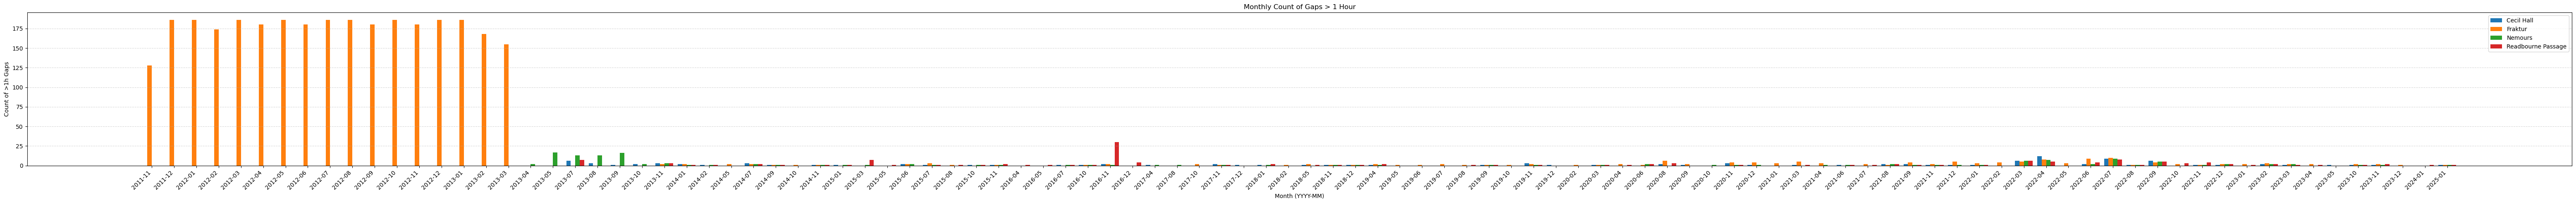

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

GAP_MIN = 60  # minutes

def gaps_over_threshold(df, thresh_min=GAP_MIN):
    s = df["Timestamp"].sort_values().reset_index(drop=True)
    gaps = s.diff().dt.total_seconds().div(60)  # minutes
    idx = gaps[gaps > thresh_min].index
    return pd.DataFrame({
        "Gap Start": s.iloc[idx-1].values,
        "Gap End": s.iloc[idx].values,
        "Duration_min": gaps.loc[idx].values
    })

# 1) Build a combined table of gaps > 1h across rooms
gap_rows = []
for room, df in room_df.items():
    gt = gaps_over_threshold(df, GAP_MIN)
    if not gt.empty:
        gt["Room"] = room
        gap_rows.append(gt)

if not gap_rows:
    print("✅ No gaps > 1 hour in any room.")
else:
    gaps_all = pd.concat(gap_rows, ignore_index=True)
    gaps_all["Month"] = pd.to_datetime(gaps_all["Gap End"]).dt.to_period("M")

    # 2) Monthly counts per room
    monthly_counts = (gaps_all
        .groupby(["Room","Month"])
        .size()
        .reset_index(name="Gaps>1h"))
    monthly_counts["Month_str"] = monthly_counts["Month"].astype(str)

    # 3) Plot grouped bars
    rooms = monthly_counts["Room"].unique().tolist()
    months = sorted(monthly_counts["Month_str"].unique())

    width = 0.8 / max(len(rooms), 1)
    plt.figure(figsize=(max(10, len(months)*0.6), 5))

    for i, room in enumerate(rooms):
        sub = monthly_counts[monthly_counts["Room"] == room].set_index("Month_str").reindex(months).fillna(0)
        x = range(len(months))
        plt.bar([xx + i*width for xx in x], sub["Gaps>1h"].values, width=width, label=room)

    plt.title("Monthly Count of Gaps > 1 Hour")
    plt.xlabel("Month (YYYY-MM)")
    plt.ylabel("Count of >1h Gaps")
    plt.xticks([xx + (len(rooms)-1)*width/2 for xx in range(len(months))], months, rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


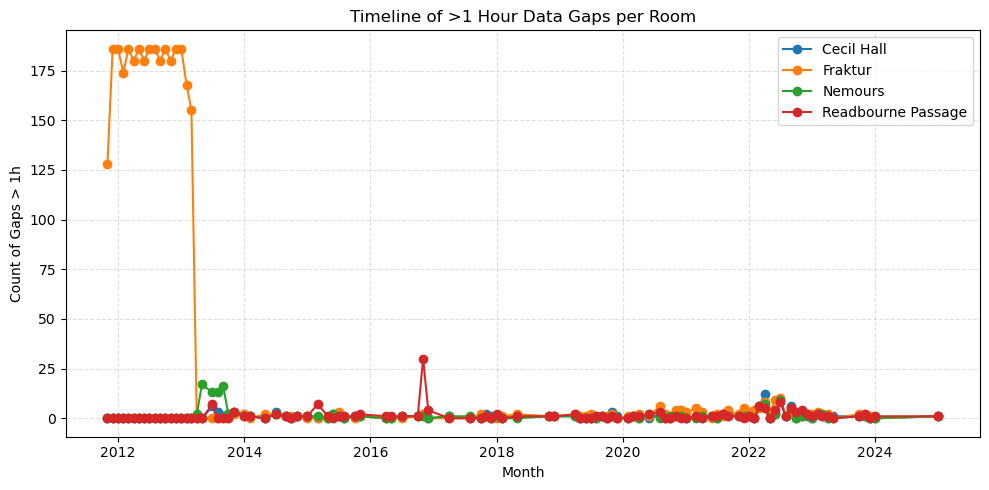

In [174]:
plt.figure(figsize=(10,5))
for i, room in enumerate(rooms):
    sub = monthly_counts[monthly_counts["Room"] == room].set_index("Month_str").reindex(months).fillna(0)
    x = pd.to_datetime(sub.index)
    plt.plot(x, sub["Gaps>1h"], marker='o', label=room)

plt.title("Timeline of >1 Hour Data Gaps per Room")
plt.xlabel("Month")
plt.ylabel("Count of Gaps > 1h")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [175]:
import pandas as pd

# pick your threshold
THRESHOLD = 75.0  # °F

# daily mean per room
daily_rows = []
for room, df in room_df.items():
    d = df.copy()
    d = d.dropna(subset=["Temp_F"])
    d = d[(d["Temp_F"] >= 40) & (d["Temp_F"] <= 100)]  # sanity range
    d["Date"] = d["Timestamp"].dt.date
    g = d.groupby("Date")["Temp_F"].mean().reset_index()
    g["Room"] = room
    daily_rows.append(g)

daily = pd.concat(daily_rows, ignore_index=True)
daily.rename(columns={"Temp_F": "DailyMean_F"}, inplace=True)


In [176]:
hot_counts = (
    daily.assign(is_hot = daily["DailyMean_F"] > THRESHOLD)
         .groupby("Room")["is_hot"]
         .agg(
             Days_above_75F="sum",
             Total_Days="count"
         )
         .reset_index()
)

hot_counts["Pct_Days_above_75F"] = (
    hot_counts["Days_above_75F"] / hot_counts["Total_Days"] * 100
).round(2)

hot_counts = hot_counts.sort_values("Pct_Days_above_75F", ascending=False)
display(hot_counts)


,Room,Days_above_75F,Total_Days,Pct_Days_above_75F
0,Cecil Hall,16,3529,0.45
3,Readbourne Passage,3,3584,0.08
1,Fraktur,2,4174,0.05
2,Nemours,0,3560,0.00


In [177]:
decaying = ["Cecil Hall", "Fraktur", "Readbourne Passage"]
adjacent = ["Nemours", "Readbourne Room"]

hot_decaying = hot_counts[hot_counts["Room"].isin(decaying)]
hot_adjacent = hot_counts[hot_counts["Room"].isin(adjacent)]

hot_decaying, hot_adjacent


(                 Room  Days_above_75F  Total_Days  Pct_Days_above_75F
 0          Cecil Hall              16        3529                0.45
 3  Readbourne Passage               3        3584                0.08
 1             Fraktur               2        4174                0.05,
       Room  Days_above_75F  Total_Days  Pct_Days_above_75F
 2  Nemours               0        3560                 0.0)

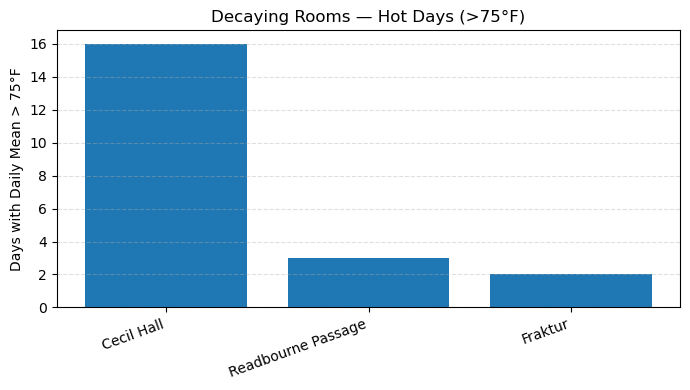

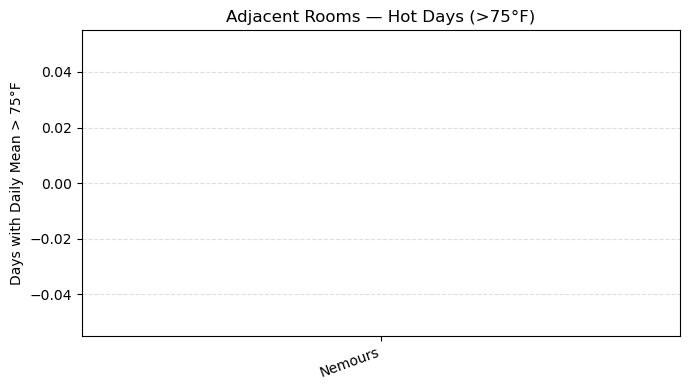

In [178]:
def plot_hot_bars(df, title):
    if df.empty:
        print(f"{title}: no data")
        return
    plt.figure(figsize=(7,4))
    x = range(len(df))
    plt.bar(x, df["Days_above_75F"])
    plt.xticks(x, df["Room"], rotation=20, ha="right")
    plt.ylabel("Days with Daily Mean > 75°F")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_hot_bars(hot_decaying, "Decaying Rooms — Hot Days (>75°F)")
plot_hot_bars(hot_adjacent, "Adjacent Rooms — Hot Days (>75°F)")


In [179]:
import pandas as pd

THRESHOLD = 75.0  # °F
daily_rows = []

for room, df in room_df.items():
    d = df.copy()
    d = d.dropna(subset=["Temp_F"])
    d = d[(d["Temp_F"] >= 40) & (d["Temp_F"] <= 100)]  # realistic indoor range
    d["Date"] = d["Timestamp"].dt.date
    g = d.groupby("Date")["Temp_F"].mean().reset_index()
    g["Room"] = room
    daily_rows.append(g)

daily = pd.concat(daily_rows, ignore_index=True)
daily.rename(columns={"Temp_F": "DailyMean_F"}, inplace=True)


In [180]:
hot_counts = (
    daily.assign(is_hot = daily["DailyMean_F"] > THRESHOLD)
         .groupby("Room")["is_hot"]
         .agg(Days_above_75F="sum", Total_Days="count")
         .reset_index()
)

hot_counts["Pct_Days_above_75F"] = (
    hot_counts["Days_above_75F"] / hot_counts["Total_Days"] * 100
).round(2)

display(hot_counts.sort_values("Pct_Days_above_75F", ascending=False))


,Room,Days_above_75F,Total_Days,Pct_Days_above_75F
0,Cecil Hall,16,3529,0.45
3,Readbourne Passage,3,3584,0.08
1,Fraktur,2,4174,0.05
2,Nemours,0,3560,0.00


In [181]:
# Filter for hot days only
hot_days = daily[daily["DailyMean_F"] > THRESHOLD].copy()
hot_days["Month"] = pd.to_datetime(hot_days["Date"]).dt.to_period("M")

# How many hot days per month per room
hot_monthly = (
    hot_days.groupby(["Room", "Month"]).size()
    .reset_index(name="Days_above_75F")
    .sort_values(["Room", "Month"])
)

display(hot_monthly.head(20))


,Room,Month,Days_above_75F
0,Cecil Hall,2020-08,2
1,Cecil Hall,2022-06,3
2,Cecil Hall,2022-07,11
3,Fraktur,2022-07,2
4,Readbourne Passage,2022-11,3


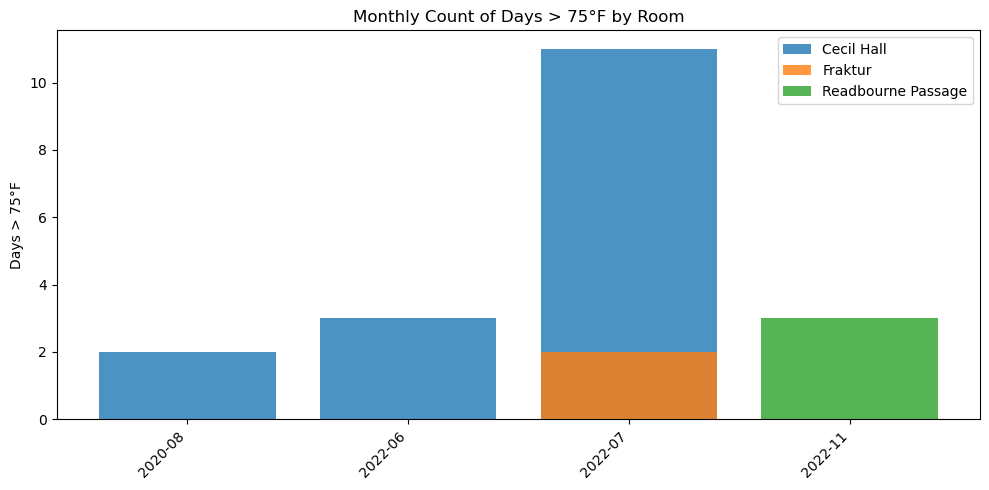

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for room in hot_monthly["Room"].unique():
    sub = hot_monthly[hot_monthly["Room"] == room]
    plt.bar(sub["Month"].astype(str), sub["Days_above_75F"], label=room, alpha=0.8)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Days > 75°F")
plt.title("Monthly Count of Days > 75°F by Room")
plt.legend()
plt.tight_layout()
plt.show()


In [183]:
# keep only days above threshold
hot_day_stats = (
    daily[daily["DailyMean_F"] > THRESHOLD]
        .assign(Month = pd.to_datetime(daily["Date"]).dt.to_period("M"))
        .groupby(["Room", "Month"])
        .agg(
            Days_above_75F=("DailyMean_F", "count"),
            Mean_on_hot_days=("DailyMean_F", "mean"),
            Max_on_hot_days=("DailyMean_F", "max"),
        )
        .reset_index()
)

display(hot_day_stats.head(10))


,Room,Month,Days_above_75F,Mean_on_hot_days,Max_on_hot_days
0,Cecil Hall,2020-08,2,75.672917,75.956250
1,Cecil Hall,2022-06,3,75.130938,75.192857
2,Cecil Hall,2022-07,11,75.448273,75.568085
3,Fraktur,2022-07,2,75.042187,75.068750
4,Readbourne Passage,2022-11,3,90.115278,92.900000


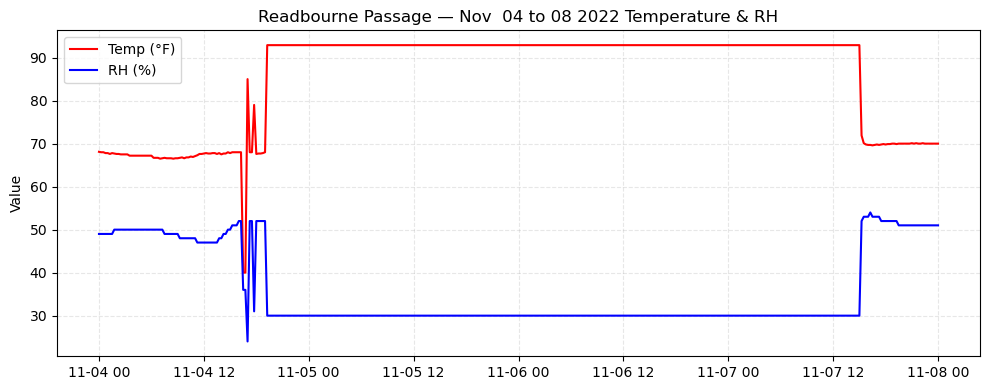

In [139]:
room = "Readbourne Passage"
sub = room_df[room]
mask = (sub["Timestamp"] >= "2022-11-04") & (sub["Timestamp"] <= "2022-11-08")
sub_period = sub.loc[mask]

plt.figure(figsize=(10,4))
plt.plot(sub_period["Timestamp"], sub_period["Temp_F"], label="Temp (°F)", color="red")
plt.plot(sub_period["Timestamp"], sub_period["RH"], label="RH (%)", color="blue")
plt.legend()
plt.title("Readbourne Passage — Nov  04 to 08 2022 Temperature & RH")
plt.ylabel("Value")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

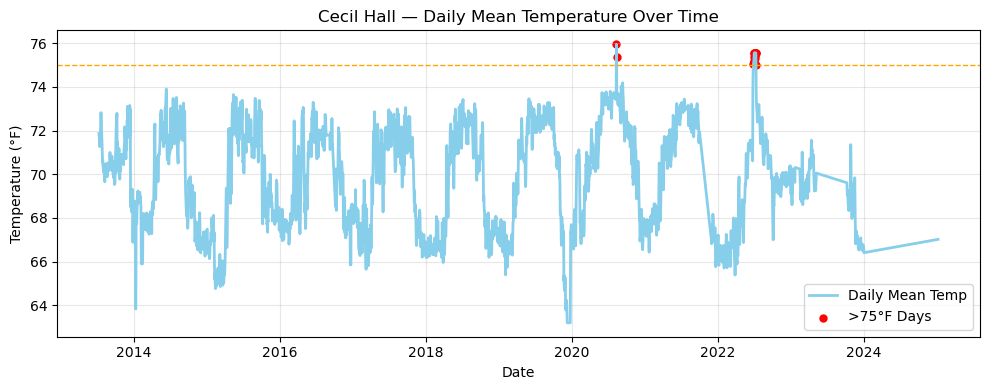

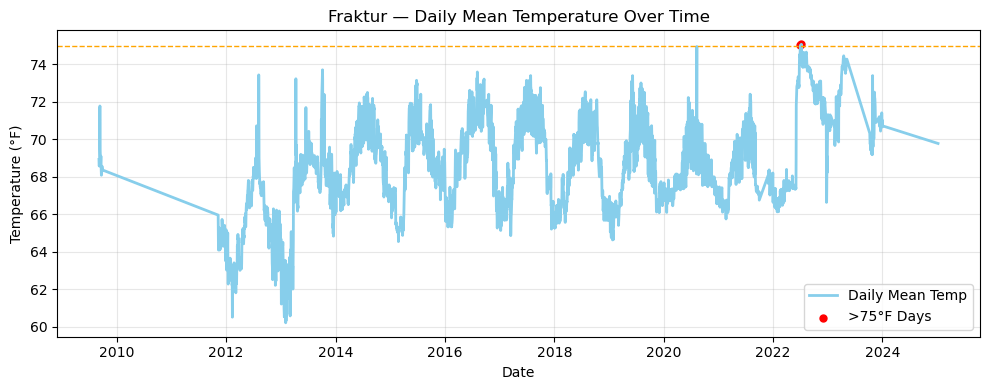

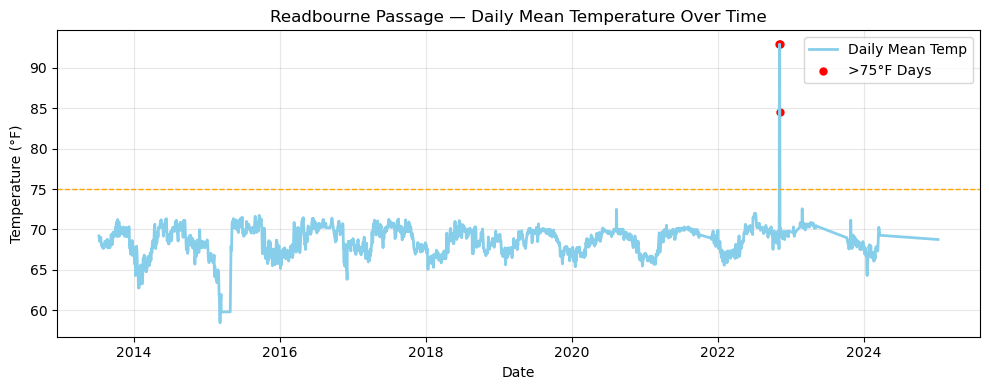

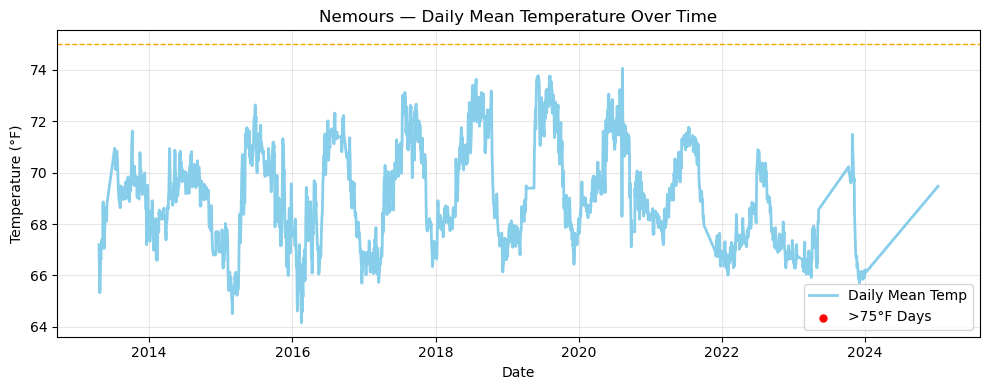

In [142]:
THRESHOLD = 75

for room in daily["Room"].unique():
    sub = daily[daily["Room"] == room].copy()
    sub["Date"] = pd.to_datetime(sub["Date"])
    
    plt.figure(figsize=(10,4))
    plt.plot(sub["Date"], sub["DailyMean_F"], color="skyblue", linewidth=2, label="Daily Mean Temp")
    
    # Highlight hot days
    hot = sub[sub["DailyMean_F"] > THRESHOLD]
    plt.scatter(hot["Date"], hot["DailyMean_F"], color="red", s=25, label=">75°F Days")
    
    plt.axhline(THRESHOLD, color="orange", linestyle="--", linewidth=1)
    plt.title(f"{room} — Daily Mean Temperature Over Time")
    plt.ylabel("Temperature (°F)")
    plt.xlabel("Date")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

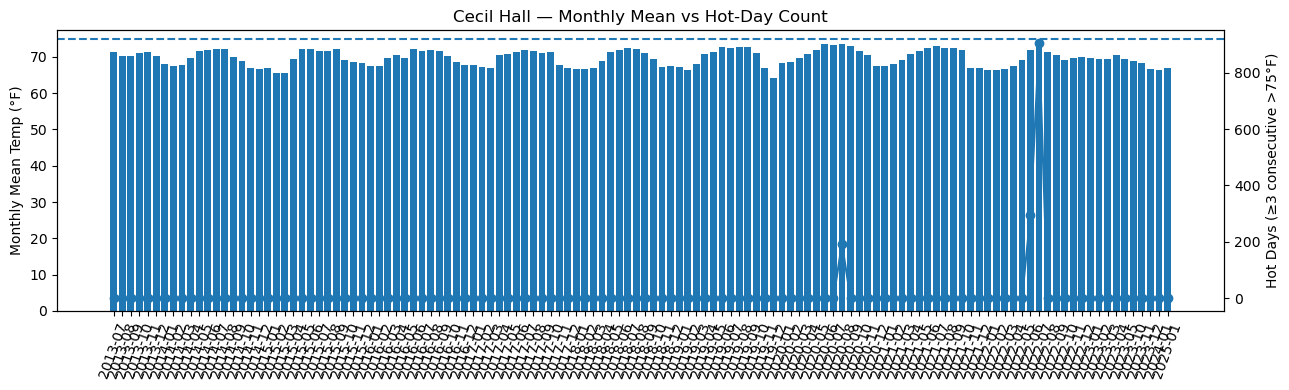

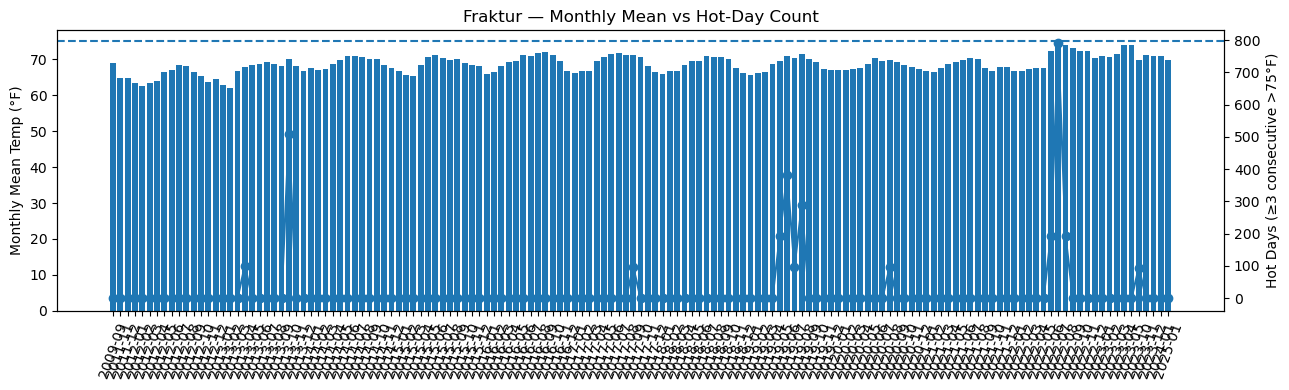

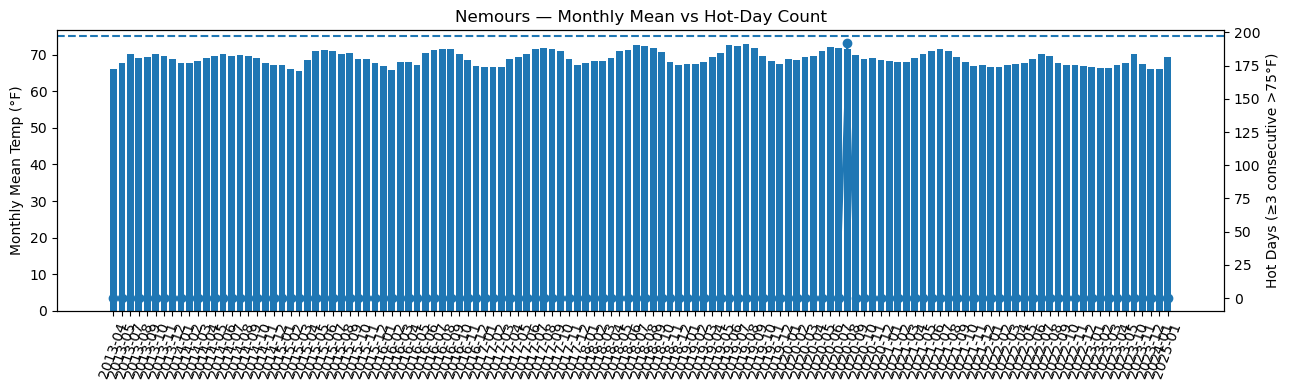

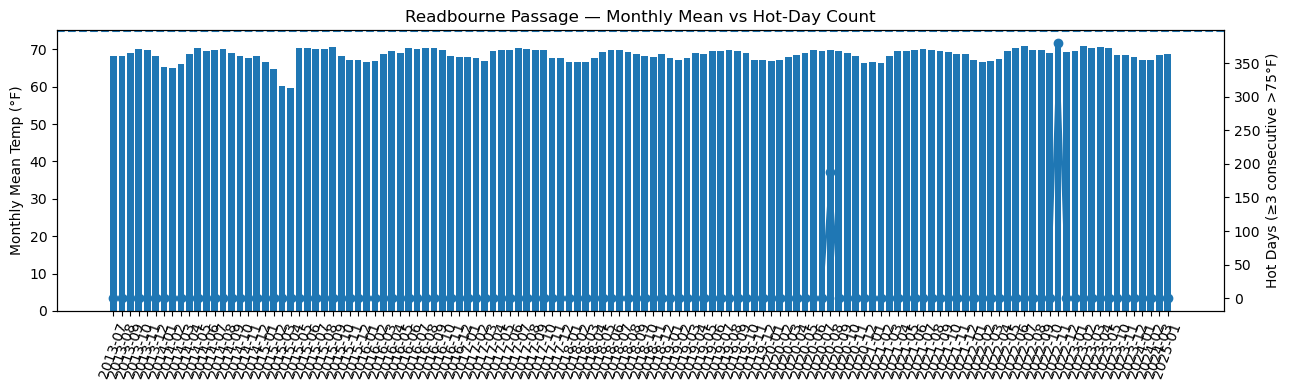

In [153]:
def bars_plus_hot(room_name, ms=monthly_summary):
    sub = ms[ms["Room"] == room_name].copy()
    sub["YearMonth"] = sub["Month"].dt.to_period("M").astype(str)

    fig, ax1 = plt.subplots(figsize=(13,4))
    ax1.bar(sub["YearMonth"], sub["Avg_Temp"], width=0.8)
    ax1.axhline(75, linestyle="--")
    ax1.set_ylabel("Monthly Mean Temp (°F)")
    ax1.set_title(f"{room_name} — Monthly Mean vs Hot-Day Count")
    ax1.tick_params(axis="x", rotation=70)

    ax2 = ax1.twinx()
    ax2.plot(sub["YearMonth"], sub["Hot_Days"], marker="o")
    ax2.set_ylabel("Hot Days (≥3 consecutive >75°F)")

    fig.tight_layout()
    plt.show()

for rm in monthly_summary["Room"].unique():
    bars_plus_hot(rm)


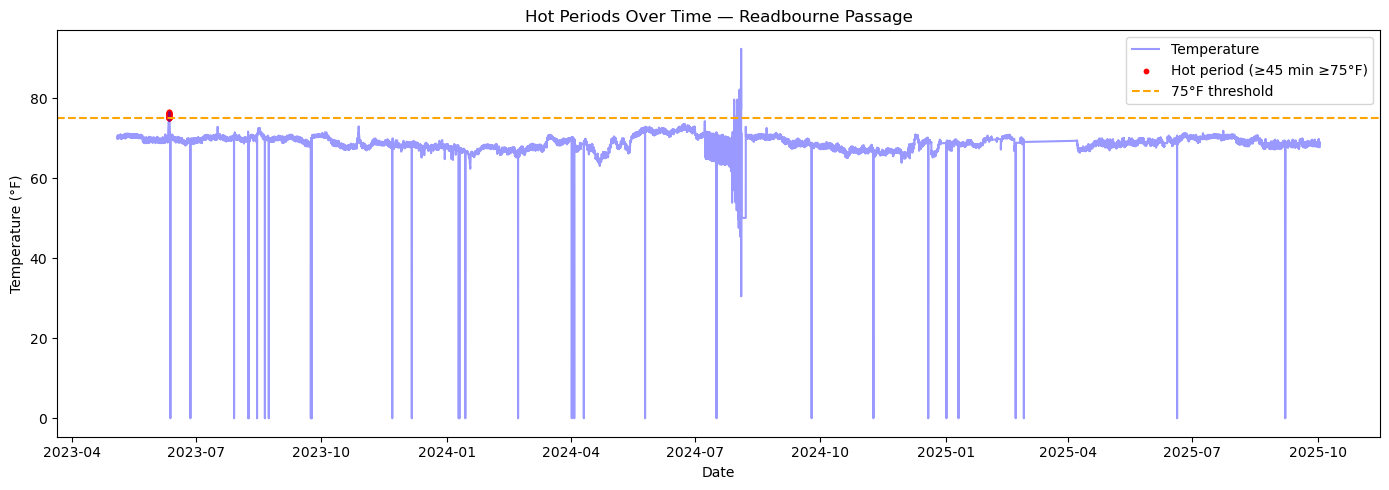

/var/folders/2l/14yhlpvn4pv4rlg7jw32j4hm0000gn/T/ipykernel_30051/3457247670.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_df["MonthYear"] = hot_df["Timestamp"].dt.to_period("M")


,MonthYear,AvgHotTemp,MaxHotTemp,Readings
0,2023-06,75.730435,76.6,23


In [185]:
import matplotlib.pyplot as plt
import pandas as pd

THRESHOLD = 75.0


room = "Readbourne Passage"
df = normalize_df(clean[room], room)
df["Date"] = df["Timestamp"].dt.date
df = df.sort_values("Timestamp")

# find hot streaks (≥ 3 consecutive readings above threshold)
is_hot = df["Temp_F"] >= THRESHOLD
grp = (is_hot != is_hot.shift()).cumsum()
df["HotGroup"] = grp.where(is_hot)  # group id for hot streaks
hot_groups = df["HotGroup"].dropna().unique()

# only keep those groups with at least 3 consecutive readings
valid_hot_groups = [
    g for g in hot_groups if (df["HotGroup"] == g).sum() >= 3
]
hot_df = df[df["HotGroup"].isin(valid_hot_groups)]

# add month/year for plotting
df["Month"] = df["Timestamp"].dt.to_period("M").astype(str)

# plot
plt.figure(figsize=(14, 5))
plt.plot(df["Timestamp"], df["Temp_F"], color="blue", alpha=0.4, label="Temperature")
plt.scatter(
    hot_df["Timestamp"],
    hot_df["Temp_F"],
    color="red",
    s=10,
    label="Hot period (≥45 min ≥75°F)"
)
plt.axhline(THRESHOLD, color="orange", linestyle="--", label="75°F threshold")
plt.title(f"Hot Periods Over Time — {room}")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.tight_layout()
plt.show()

# monthly summary of these hot events
hot_df["MonthYear"] = hot_df["Timestamp"].dt.to_period("M")
summary = (
    hot_df.groupby("MonthYear")["Temp_F"]
          .agg(["mean","max","count"])
          .rename(columns={"mean":"AvgHotTemp","max":"MaxHotTemp","count":"Readings"})
          .reset_index()
)
display(summary)


In [201]:
summary = pd.DataFrame({
    room: {
        "Mean |ΔT/Δt| (°F/min)": data["Rate_F_per_min"].abs().mean(),
        "Max |ΔT/Δt| (°F/min)": data["Rate_F_per_min"].abs().max()
    }
    for room, data in results.items()
}).T.round(4)

print("\n===== Rate of Change Comparison =====")
display(summary)



===== Rate of Change Comparison =====


,Mean |ΔT/Δt| (°F/min),Max |ΔT/Δt| (°F/min)
Cecil Hall,NaN,NaN
Fraktur,NaN,NaN
Readbourne Passage,NaN,NaN
Nemours,NaN,NaN
Readbourne Room,NaN,NaN
